### Use K Means Clustering to Group similar images

In [1]:
import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulatio 
import matplotlib.pyplot as plt                   # For graphics
import seaborn as sns    
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits

### Load Digits data from scikit learn images data

In [2]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [3]:
digits.data[0:2]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

### Initialize Kmeans class from Scikit Learn for clusters = 10

In [4]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

In [6]:
kmeans.cluster_centers_.shape

(10, 64)

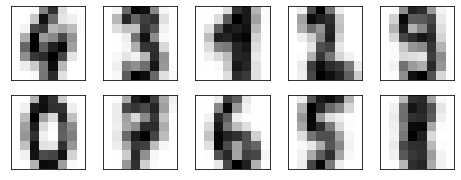

In [5]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

### Add lables to predicted cluster

In [9]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [11]:
digits["target"]

array([0, 1, 2, ..., 8, 9, 8])

In [17]:
clusters.shape

(1797,)

In [12]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
print(labels)
print(labels.shape)
for i in range(10):
    mask = (clusters == i)
    print(mask)
    labels[mask] = mode(digits.target[mask])[0]

[0 0 0 ... 0 0 0]
(1797,)
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False  True  True]
[ True False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False  True  True ...  True False False]


In [18]:
mask.shape

(1797,)

In [ ]:
clusters, clusters.shape

In [ ]:
digits.target.shape

### Accuracy of prediction of Digit - Unsupervisd Learning Method

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7952142459654981

Text(91.68, 0.5, 'predicted label')

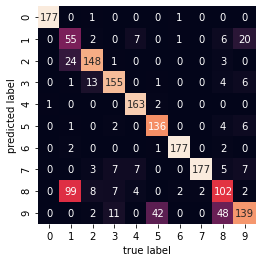

In [20]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

### Image Segmentation Using KMeans Clustering

- In digital image processing and computer vision, image segmentation is the process of partitioning a digital image into multiple segments

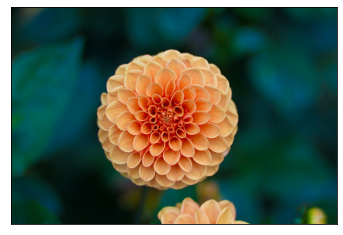

In [21]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

In [22]:
flower.shape

(427, 640, 3)

In [23]:
data = flower / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [31]:
kmeans = KMeans(3)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

In [32]:
new_colors.shape

(273280, 3)

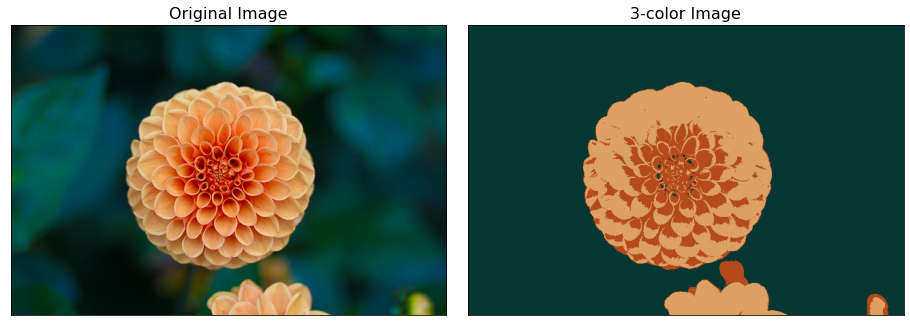

In [34]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('3-color Image', size=16);

### Further Exploration in Image Processing and Segmentation using Opencv-Python
- https://docs.opencv.org/master/d1/d5c/tutorial_py_kmeans_opencv.html